In [1]:
import pandas as pd
import numpy as np
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import Descriptors

from IPython.display import display
from PIL import Image
import io

In [2]:
def count_num_reaction(data):
    '''Count how many reactions there are'''
    rxnCount_data = data['Reaction ID'].nunique()
    print('Number of Reactions:', rxnCount_data)
    print('Number of Rows:', data.shape[0])


def view_reactionScheme(data, NumReaction_to_view, duplicate):
    '''pick and show reaction scheme '''

    if duplicate == 'drop duplicate':
        Reaction_data = data.drop_duplicates(subset=['Reaction ID'], keep='first')
        Reaction_data = Reaction_data.reset_index(drop=True)
    elif duplicate == 'keep duplicate': 
        Reaction_data = data.reset_index(drop=False)
    else:
        raise ValueError('Invalid input')
        
    if NumReaction_to_view > Reaction_data.shape[0]:
        raise ValueError('Number of reactions to view is more than the total number of reactions in the dataset')
    else:
        # Draw
        random_start = np.random.randint(0, (Reaction_data.shape[0] - NumReaction_to_view + 1) , size=1)[0]
        for idx, row in Reaction_data[random_start: random_start + NumReaction_to_view].iterrows():
            reaction_smarts = row['Reaction']
            rxn = rdChemReactions.ReactionFromSmarts(reaction_smarts, useSmiles=True)
            if rxn:
                print('Reaction ID:', Reaction_data.iloc[idx]['Reaction ID'])
                img = Draw.ReactionToImage(rxn)
                
                # display image in notebook
                with io.BytesIO() as output:
                    img.save(output, format="PNG")
                    display(Image.open(output))
                # Return conditions
                print(row[['Largest Reactant MW', 'Reagent', 'Solvent (Reaction Details)', 'Time (Reaction Details) [h]', 'Temperature (Reaction Details) [C]', 'Yield']])
                print(f'Link: {row["Links to Reaxys"]}\n')
                print(f'Reaction Link: {row["Reaction: Links to Reaxys"]}\n')



## <span style="color:blue">  Import data after filtering consistent reaction conditions </span>

In [3]:
data = pd.read_excel('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/ketone_in_chain(no_manualcheck).xlsx')
count_num_reaction(data)

Number of Reactions: 628
Number of Rows: 628


## <span style="color:blue">  Sort data by certain column </span>

In [4]:
##USE THIS CODE TO sort by any column
column_to_sort = 'Largest Reactant MW' # CHange here
# Sort the data frame by MW of Reactant MW from smallest to largest
data = data.sort_values(by= column_to_sort , ascending=True, ignore_index= True)

In [4]:
# Sort by references for easy to check
column_to_sort = 'Links to Reaxys'

# Create a temporary sorting key based on the value counts of the column
sorting_key = data[column_to_sort].value_counts().sort_values(ascending=False)

# Sort the data frame using the temporary sorting key
sorting_key_map = {value: index for index, value in enumerate(sorting_key.index)}

data = data.sort_values(by=column_to_sort, key=lambda x: x.map(sorting_key_map), ignore_index=True)

## <span style="color:blue">  View reaction </span>

Reaction ID: 4748814


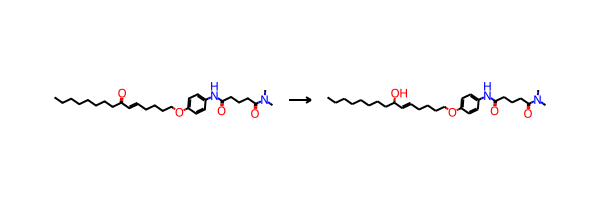

Largest Reactant MW                                    472.67
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                              85 percent
Name: 0, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4748814&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750174


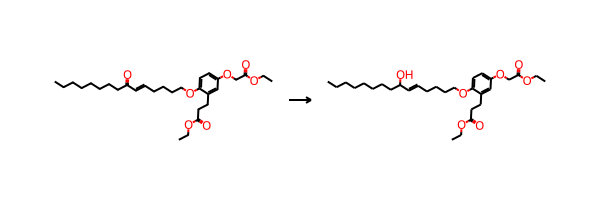

Largest Reactant MW                                   518.691
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 1, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750174&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750005


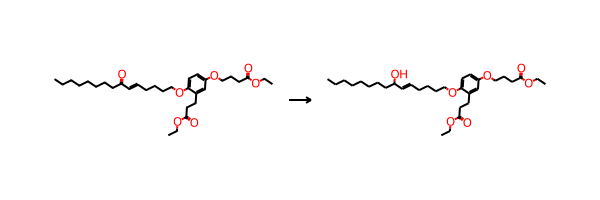

Largest Reactant MW                                   546.745
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 2, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750005&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750165


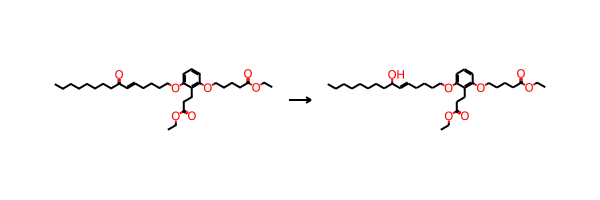

Largest Reactant MW                                   560.772
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                              99 percent
Name: 3, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750165&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4749734


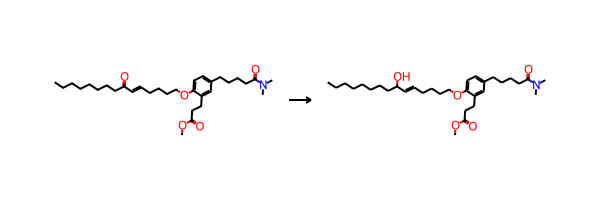

Largest Reactant MW                                   529.762
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 4, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4749734&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4749675


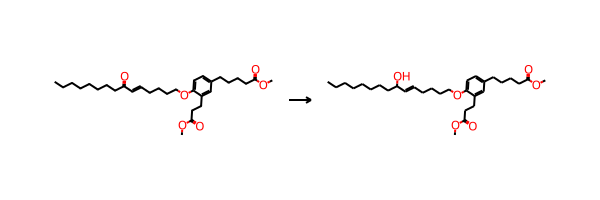

Largest Reactant MW                                   516.719
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                              94 percent
Name: 5, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4749675&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750582


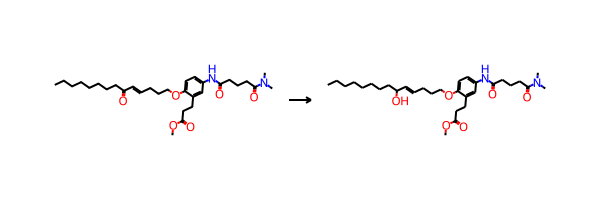

Largest Reactant MW                                   544.733
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 6, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750582&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4746432


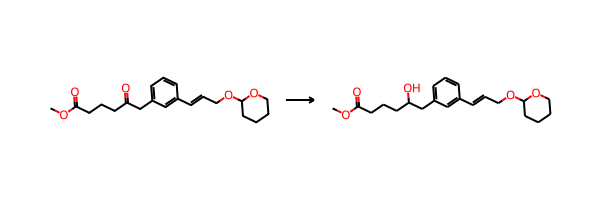

Largest Reactant MW                                    360.45
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 7, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4746432&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750159


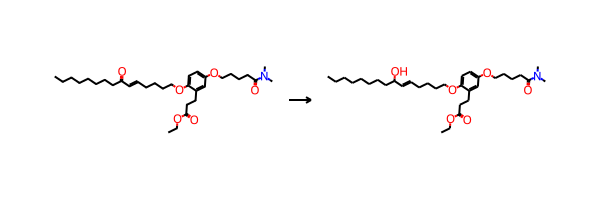

Largest Reactant MW                                   559.788
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 8, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750159&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4745645


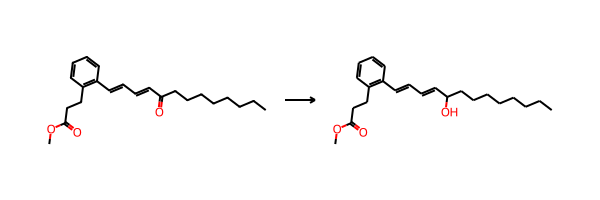

Largest Reactant MW                                   356.506
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                              87 percent
Name: 9, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4745645&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750160


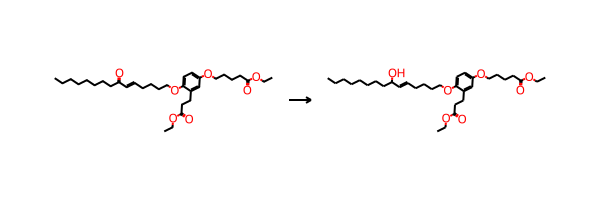

Largest Reactant MW                                   560.772
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 10, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750160&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4748694


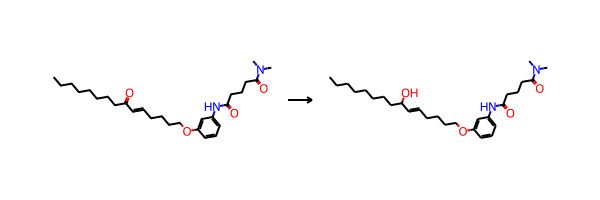

Largest Reactant MW                                    472.67
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                              75 percent
Name: 11, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4748694&database=RX&origin=ReaxysOutput&ln=



In [35]:
Number_of_reaction_to_view = 12 #if number less than data size, it will randomnly pick.

duplicate = 'drop duplicate' #not matter at this stage

view_reactionScheme(data[84:96], Number_of_reaction_to_view, duplicate)

In [33]:
data[84:96]['Reaction ID']

84    4748814
85    4750174
86    4750005
87    4750165
88    4749734
89    4749675
90    4750582
91    4746432
92    4750159
93    4745645
94    4750160
95    4748694
Name: Reaction ID, dtype: int64

Reaction ID: 4750165


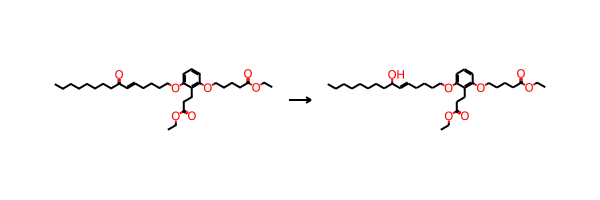

Largest Reactant MW                                   560.772
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                              99 percent
Name: 0, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750165&database=RX&origin=ReaxysOutput&ln=

Reaction ID: 4750160


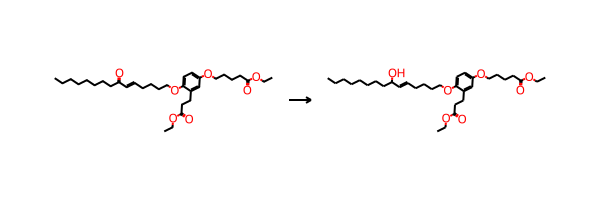

Largest Reactant MW                                   560.772
Reagent                               sodium tetrahydroborate
Solvent (Reaction Details)                           methanol
Time (Reaction Details) [h]                              0.25
Temperature (Reaction Details) [C]                          0
Yield                                             100 percent
Name: 1, dtype: object
Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=C&query=CNR.CNR%3D6065149&database=RX&origin=ReaxysOutput&ln=

Reaction Link: https://www.reaxys.com/reaxys/secured/hopinto.do?context=R&query=RX.ID%3D4750160&database=RX&origin=ReaxysOutput&ln=



In [23]:
view_reactionScheme(data[data['Reaction ID'].isin({4750165,
4750160})], 2, duplicate)
